In [57]:
%matplotlib inline
import numpy as np
import pandas as pd 

In [58]:
start_date='2017-03-01'
end_date='2017-04-01'
dates=pd.date_range(start_date, end_date)

In [59]:
df1 = pd.DataFrame(index=dates)
df1.head()

""
2017-03-01
2017-03-02
2017-03-03
2017-03-04
2017-03-05


In [60]:
for symb in ['AAPL', 'HCP']:
    df_temp = pd.read_csv("../data/%s.csv" % symb, index_col="Date", parse_dates=True, \
                    usecols=["Date", "Adj Close"], na_values=['nan'])
    df_temp = df_temp.rename(columns={"Adj Close": symb})
#     print df_temp.head()
    df1 = df1.join(df_temp, lsuffix="1", rsuffix="2")

df1 = df1.dropna(how="any")
df1.head()

,AAPL,HCP
2017-03-01,139.789993,32.200001
2017-03-02,138.960007,32.110001
2017-03-03,139.779999,32.200001
2017-03-06,139.339996,31.500000
2017-03-07,139.520004,31.299999


In [61]:
df1.ix['2017-03-25': '2017-03-29']

,AAPL,HCP
2017-03-27,140.880005,30.790001
2017-03-28,143.800003,31.000000
2017-03-29,144.119995,31.020000


In [63]:
df1.ix['2017-03-20':'2017-03-25', ['AAPL']]

,AAPL
2017-03-20,141.460007
2017-03-21,139.839996
2017-03-22,141.419998
2017-03-23,140.919998
2017-03-24,140.639999


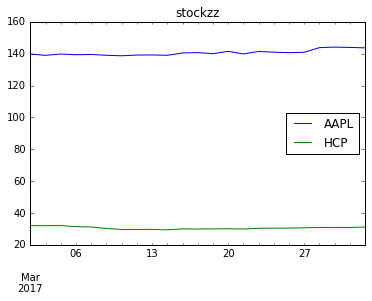

In [66]:
df1.plot(title="stockzz")

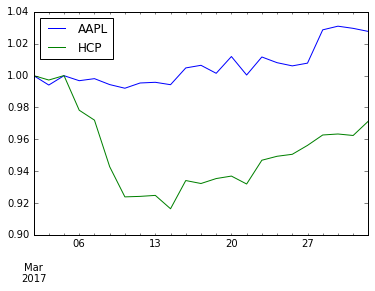

In [70]:
df_normed = df1 / df1.ix[0,:]
df_normed.plot()